# Notebook 5 - Natural Language Processing
### Exploring the NLP pipeline in NLTK

CSI4106 Artificial Intelligence  
Fall 2019  
Prepared by Caroline Barrière and Julian Templeton

***INTRODUCTION***:  

This notebook is split in two parts.  In **Part A**, you will explore the different steps of the NLP pipeline, and in **Part B**, you will revisit some of the Machine Learning algorithms used in prior notebooks to perform Polarity Detection on Rotten Tomatoe reviews with NLP techniques used on the reviews.  We will work with the package *nltk* which is very useful for NLP analysis.  You will need to install it before you start.  Information about NLTK are here: http://www.nltk.org/.

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time.  
Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, Sign the notebook (at the end of the notebook), and submit it.  

*The notebook will be marked on 42.  
Each **(TO DO)** has a number of points associated with it.*
***

In [53]:
# First install nltk library: pip install nltk
# Next import nltk into python
import nltk 
# Open the installer to download nltk packages
# This will take a moment to open. Just download all to get eevrything that would need.
# Once downloaded you can comment this function to avoid calling when running
#nltk.download() 

**PART A - NATURAL LANGUAGE PROCESSING PIPELINE**  
  
In this part, we will use the modules from *nltk* to perform the different steps of the pipeline.  
We first define a small sample text below.

In [54]:
sampleText = "Every week we have two A.I. lectures in this course. The course number is CSI4106. "\
             "In the course, we do many Jupyter Notebooks. Each notebook covers a different topic such as a SVM "\
             "classifier, Simulated Annealing, Depth-First Search, and many more. In class we have looked "\
             "at intricate algorithms, such as the ARC-3 algorithm and neural network learning algorithms."

#### Step 1 - Tokenization

In [55]:
from nltk import word_tokenize

tokens = word_tokenize(sampleText)
# number of tokens
len(tokens)

70

In [56]:
# Showing the tokens
print(tokens)

['Every', 'week', 'we', 'have', 'two', 'A.I', '.', 'lectures', 'in', 'this', 'course', '.', 'The', 'course', 'number', 'is', 'CSI4106', '.', 'In', 'the', 'course', ',', 'we', 'do', 'many', 'Jupyter', 'Notebooks', '.', 'Each', 'notebook', 'covers', 'a', 'different', 'topic', 'such', 'as', 'a', 'SVM', 'classifier', ',', 'Simulated', 'Annealing', ',', 'Depth-First', 'Search', ',', 'and', 'many', 'more', '.', 'In', 'class', 'we', 'have', 'looked', 'at', 'intricate', 'algorithms', ',', 'such', 'as', 'the', 'ARC-3', 'algorithm', 'and', 'neural', 'network', 'learning', 'algorithms', '.']


#### Step 2a - Stemming (Porter Stemmer)
For a reference to the [algorithm](http://snowballstem.org/algorithms/).

In [57]:
# nltk contains different stemmers, and we try the Porter Stemmer here
from nltk.stem import *
from nltk.stem.porter import *

stemmer = PorterStemmer()
singles = [stemmer.stem(t) for t in tokens]
print(singles)

['everi', 'week', 'we', 'have', 'two', 'a.i', '.', 'lectur', 'in', 'thi', 'cours', '.', 'the', 'cours', 'number', 'is', 'csi4106', '.', 'In', 'the', 'cours', ',', 'we', 'do', 'mani', 'jupyt', 'notebook', '.', 'each', 'notebook', 'cover', 'a', 'differ', 'topic', 'such', 'as', 'a', 'svm', 'classifi', ',', 'simul', 'anneal', ',', 'depth-first', 'search', ',', 'and', 'mani', 'more', '.', 'In', 'class', 'we', 'have', 'look', 'at', 'intric', 'algorithm', ',', 'such', 'as', 'the', 'arc-3', 'algorithm', 'and', 'neural', 'network', 'learn', 'algorithm', '.']


#### Step 2b - Lemmatization
The lemmatization relies on a resource called Wordnet (https://wordnet.princeton.edu/), in which lemmas are defined.

In [58]:
# Download the wordnet resource
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lushs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
wnl = nltk.WordNetLemmatizer()
lemmas = [wnl.lemmatize(t) for t in tokens]
print(lemmas)

['Every', 'week', 'we', 'have', 'two', 'A.I', '.', 'lecture', 'in', 'this', 'course', '.', 'The', 'course', 'number', 'is', 'CSI4106', '.', 'In', 'the', 'course', ',', 'we', 'do', 'many', 'Jupyter', 'Notebooks', '.', 'Each', 'notebook', 'cover', 'a', 'different', 'topic', 'such', 'a', 'a', 'SVM', 'classifier', ',', 'Simulated', 'Annealing', ',', 'Depth-First', 'Search', ',', 'and', 'many', 'more', '.', 'In', 'class', 'we', 'have', 'looked', 'at', 'intricate', 'algorithm', ',', 'such', 'a', 'the', 'ARC-3', 'algorithm', 'and', 'neural', 'network', 'learning', 'algorithm', '.']


**(TO DO) Q1 - 2 marks**    
Describe in your own words the difference between lemmatization and stemming.  Use examples from above to show the difference.

The lemmatization takes context into account, so the results preserve the POS information for that word.
However, the results of stemming do not preserve the POS information.
In other words, the results of stemming are often words that do not exist in the dictionary.
EX) lemmatization: lecture, course -> lecture, course (still noun, preserving its POS)
    stemming: lecture, course -> lectur, cours (not preserving its POS)

#### Step 3 - Part-Of-Speech tagging  (POS tagging)
As we've seen in class, sentence splitting can be learned through a supervised model.  POS tagging can also be learned through a supervised model.  Here, we will use a perceptron model pre-trained in NLTK.  Look here http://www.nltk.org/_modules/nltk/tag/perceptron.html to understand the model.  
  
The full sest of tags is available [here](https://www.clips.uantwerpen.be/pages/mbsp-tags)

In [60]:
# nltk contains a method to obtain the part-of-speech of each token
nltk.download('averaged_perceptron_tagger')
posTokens = nltk.pos_tag(tokens)
print(posTokens)

[('Every', 'DT'), ('week', 'NN'), ('we', 'PRP'), ('have', 'VBP'), ('two', 'CD'), ('A.I', 'NNP'), ('.', '.'), ('lectures', 'VBZ'), ('in', 'IN'), ('this', 'DT'), ('course', 'NN'), ('.', '.'), ('The', 'DT'), ('course', 'NN'), ('number', 'NN'), ('is', 'VBZ'), ('CSI4106', 'NNP'), ('.', '.'), ('In', 'IN'), ('the', 'DT'), ('course', 'NN'), (',', ','), ('we', 'PRP'), ('do', 'VBP'), ('many', 'JJ'), ('Jupyter', 'NNP'), ('Notebooks', 'NNP'), ('.', '.'), ('Each', 'DT'), ('notebook', 'NN'), ('covers', 'VBZ'), ('a', 'DT'), ('different', 'JJ'), ('topic', 'NN'), ('such', 'JJ'), ('as', 'IN'), ('a', 'DT'), ('SVM', 'NNP'), ('classifier', 'NN'), (',', ','), ('Simulated', 'NNP'), ('Annealing', 'NNP'), (',', ','), ('Depth-First', 'NNP'), ('Search', 'NNP'), (',', ','), ('and', 'CC'), ('many', 'JJ'), ('more', 'JJR'), ('.', '.'), ('In', 'IN'), ('class', 'NN'), ('we', 'PRP'), ('have', 'VBP'), ('looked', 'VBN'), ('at', 'IN'), ('intricate', 'JJ'), ('algorithms', 'NNS'), (',', ','), ('such', 'JJ'), ('as', 'IN'), (

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lushs\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [61]:
# If we just want to see one tag in particular
print(posTokens[1])  # It's a tuple
print(posTokens[1][1])  # Second part of the tuple is the tag

('week', 'NN')
NN
N


#### Back to Step 2 

The lemmatizer we use is based on WordNet (a lexical resource commonly used in NLP) to provide a set of lemmas.  As many words are ambiguous and can be found in sentences as verbs or nouns (remember examples such as *Will's will will be achieved*), the lemmatizer can benefit from knowledge of POS.  Small problem... POS tags in Wordnet are not the same as in Treebank.  Wordnet defines only 4 POS: N (noun), V (verb), J (adjective) and R (adverb). The small method below is to obtain a partial equivalence between the tagsets.

In [62]:
from nltk.corpus import wordnet

# Try to lemmatize, this time knowing the POS
# Tagsets are often different... here we map the treebank tagset (default in pos_tag) 
# to the wordnet tagset 
# We will learn more about wordnet when we discuss resources in the Knowledge Representation module of this course

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.ADV  # just use as default, for ADV the lemmatizer doesn't change anything 

In [63]:
# Transform the tags into wordnet tags
wordnet_tags = [get_wordnet_pos(p[1]) for p in posTokens]
print(wordnet_tags)

['r', 'n', 'r', 'v', 'r', 'n', 'r', 'v', 'r', 'r', 'n', 'r', 'r', 'n', 'n', 'v', 'n', 'r', 'r', 'r', 'n', 'r', 'r', 'v', 'a', 'n', 'n', 'r', 'r', 'n', 'v', 'r', 'a', 'n', 'a', 'r', 'r', 'n', 'n', 'r', 'n', 'n', 'r', 'n', 'n', 'r', 'r', 'a', 'a', 'r', 'r', 'n', 'r', 'v', 'v', 'r', 'a', 'n', 'r', 'a', 'r', 'r', 'n', 'n', 'r', 'a', 'n', 'v', 'n', 'r']


In [64]:
# Now, let's try to lemmatize again, but we tell the lemmatizer what the POS is.
posLemmas = [wnl.lemmatize(t, w) for t, w in zip(tokens, wordnet_tags)]
print(posLemmas)

['Every', 'week', 'we', 'have', 'two', 'A.I', '.', 'lecture', 'in', 'this', 'course', '.', 'The', 'course', 'number', 'be', 'CSI4106', '.', 'In', 'the', 'course', ',', 'we', 'do', 'many', 'Jupyter', 'Notebooks', '.', 'Each', 'notebook', 'cover', 'a', 'different', 'topic', 'such', 'as', 'a', 'SVM', 'classifier', ',', 'Simulated', 'Annealing', ',', 'Depth-First', 'Search', ',', 'and', 'many', 'more', '.', 'In', 'class', 'we', 'have', 'look', 'at', 'intricate', 'algorithm', ',', 'such', 'as', 'the', 'ARC-3', 'algorithm', 'and', 'neural', 'network', 'learn', 'algorithm', '.']


**(TO DO) Q2 - 1 mark**    
Which words are lemmatized differently when provided with the additional knowledge of POS? Look at the variables *lemmas* and *posLemmas* to get this answer.

In [65]:
#Q2 - ANSWER   
#Format as: <lemmatized_word> -> <POS_lemmatized_word> only for tokens that are different between posLemmas and lemmas.  

for i in range(len(lemmas)):
    if lemmas[i] != posLemmas[i]:
        print(lemmas[i]+" -> "+posLemmas[i])


is -> be
a -> as
looked -> look
a -> as
learning -> learn


#### Step 4 - Sentence splitting

In [66]:
# Sentence splitting can be done before tokenizing and POS tagging if we wish
sentences = nltk.sent_tokenize(sampleText)
print(sentences)

['Every week we have two A.I.', 'lectures in this course.', 'The course number is CSI4106.', 'In the course, we do many Jupyter Notebooks.', 'Each notebook covers a different topic such as a SVM classifier, Simulated Annealing, Depth-First Search, and many more.', 'In class we have looked at intricate algorithms, such as the ARC-3 algorithm and neural network learning algorithms.']


**(TO DO) Q3 - 2 marks**    
How many sentences are generated?   
Give an explanation for the number of sentences returned from sentence splitting (more, less, the same? Why?).

In [67]:
#Q3 - ANSWER   
#How many sentences were generated?   

print("The number of sentences: "+str(len(sentences)))

#Give an explanation for the number of sentences returned from sentence splitting (more, less, the same? Why?).  

'''
The real number of sentences are less than results from sentence splitting.
This is because sentence splitting is not accurate regarding the end of sentences, so it often breaks sentences even where it is not the end of a sentence.

ex) Every week we have two A.I. -> this is not the end of the sentence but sentence splitting perceives as the end because of '.'
'''

The number of sentences: 6


"\nThe real number of sentences are less than results from sentence splitting.\nThis is because sentence splitting is not accurate regarding the end of sentences, so it often breaks sentences even where it is not the end of a sentence.\n\nex) Every week we have two A.I. -> this is not the end of the sentence but sentence splitting perceives as the end because of '.'\n"

**Putting it all together in a complete example**  
Having covered the NLP pipeline, we will now perform these steps on a movie review from the Rotten Tomatoes Polarity Detection dataset that we used in Notebook 3.  
  
Recall from Notebook 3:   
You will need to download the movie review dataset from the following shared Google Drive (or just copy it over from your notebook 3 folder!):
https://drive.google.com/file/d/1w1TsJB-gmIkZ28d1j7sf1sqcPmHXw352/view

This is a dataset of reviews from Rotten Tomatoes along with the Freshness of the review (Fresh or Rotten). We will be using this dataset throughout the notebook so be sure to place it in the same directory as this notebook. It contains 480000 reviews with half of them being rotten and the other half being fresh.

In [68]:
# Import pandas and load the dataset
import pandas as pd
# Import the dataset, need to use the ISO-8859-1 encoding due to some invalid UTF-8 characters
df = pd.read_csv("rt_reviews.csv", encoding="ISO-8859-1")

In [69]:
# We extract a specific review to be used for the remainder of this subsection
pipeline_review = df.iloc[11992][1]
print(pipeline_review)

 I can't figure out exactly when the film 10,000 B.C. is set, but it's definitely ancient times. Like before they had cars, guns or tabloid blogs. And definitely before they had cohesive plots or dialogue that made sense.


**(TO DO) Q4 - 5 marks**    
Perform all of the steps that we have worked with so far from the NLP Pipeline on the review pipeline_review. You will need to do all of the following:    
1. Tokenization
2. Lemmatization and Stemming
3. POS Tagging
4. POS-based lemmatization
5. Sentence Splitting

In [70]:
# TODO - Q4

# Tokenization
new_token = word_tokenize(pipeline_review)
print("After Tokenization\n")
print(new_token)
print("\n")
# Lemmatization
new_wnl = nltk.WordNetLemmatizer()
new_lemma = [new_wnl.lemmatize(t) for t in new_token]
print("After Lemmatization\n")
print(new_lemma)
print("\n")
# Stemming
new_stemmer = PorterStemmer()
new_stem = [new_stemmer.stem(t) for t in new_token]
print("After Stemming\n")
print(new_stem)
print("\n")
# POS Tagging
new_pt = nltk.pos_tag(new_token)
new_pos = [get_wordnet_pos(p[1]) for p in new_pt]
print("After POS Tagging\n")
print(new_pos)
print("\n")
# POS-based lemmatization (Wornet tags then ...)
new_pl = [new_wnl.lemmatize(t,w) for t,w in zip(new_token,wordnet_tags)]
print("After POS-based lemmatization\n")
print(new_pl)
print("\n")
# Sentence Splitting
new_ss = nltk.sent_tokenize(pipeline_review)
print("After Sentence Splitting\n")
print(new_ss)
print("\n")

After Tokenization

['I', 'ca', "n't", 'figure', 'out', 'exactly', 'when', 'the', 'film', '10,000', 'B.C', '.', 'is', 'set', ',', 'but', 'it', "'s", 'definitely', 'ancient', 'times', '.', 'Like', 'before', 'they', 'had', 'cars', ',', 'guns', 'or', 'tabloid', 'blogs', '.', 'And', 'definitely', 'before', 'they', 'had', 'cohesive', 'plots', 'or', 'dialogue', 'that', 'made', 'sense', '.']


After Lemmatization

['I', 'ca', "n't", 'figure', 'out', 'exactly', 'when', 'the', 'film', '10,000', 'B.C', '.', 'is', 'set', ',', 'but', 'it', "'s", 'definitely', 'ancient', 'time', '.', 'Like', 'before', 'they', 'had', 'car', ',', 'gun', 'or', 'tabloid', 'blog', '.', 'And', 'definitely', 'before', 'they', 'had', 'cohesive', 'plot', 'or', 'dialogue', 'that', 'made', 'sense', '.']


After Stemming

['I', 'ca', "n't", 'figur', 'out', 'exactli', 'when', 'the', 'film', '10,000', 'b.c', '.', 'is', 'set', ',', 'but', 'it', "'s", 'definit', 'ancient', 'time', '.', 'like', 'befor', 'they', 'had', 'car', ',', '

#### Step 5 - Parsing
The parser in NLTK actually is a wrapper around a java parser (from Stanford NLP).  It's a bit complex to install, so instead, we will use the following online Stanford parse tool to test pipeline_review: http://corenlp.run/   

You will need to copy the review from pipeline_review (printed above) into the *Text to annotate* box, select only *parts-of-speech* and *constituency parse* in the *Annotations* box, and click the *Submit* button to generate the output that you will be looking at.  

Below is an image exhbiting what was mentioned above (if not visible for some reason, the image is included in the Notebook 5 tab on Brightspace):

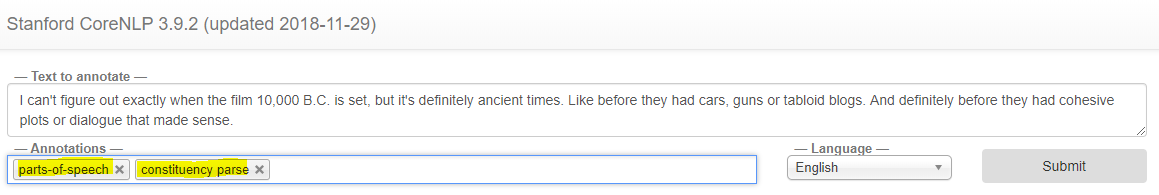

**(TO DO) Q5 - 2 marks**    
Submit the input as described above into the corenlp Web-based tool and answer the following questions.
1. Part-of-Speech: How many words are tagged as a verb (in this case any tag starting with V)?
2. Constituency Parsing: What does this output represent? How many trees are there? What do the leaves of the trees represent?

Q5 - ANSWER   

1. 7
2. This ouput represents that ,in constituency parsing, the sentence is bound over the club like noun phrase, verb phrase, etc.
   There are 3 trees.
   The leaves of each trees represent that thay are the components of each phrases.

**PART B - Supervised Learning using the NLP Pipeline**  
  
In this second part, we will be re-visiting the algorithms used in notebooks 3 and 4 to perform polarity detection on the Rotten Tomatoes dataset. However, this time we will be using various NLP techniques to modify the reviews before using them as input for the algorithms.  
 
This section will be structured in the following way:  
1. First we will walk through how to manipulate the data that we will be using for training and testing using various NLP techniques. Then, you will be given several NLP tasks to perform on the reviews that we will use for training and testing later.   
    1.1. NOTE: The tasks will be clearly defined with an example, but you will need to come up with a way to perform using what you have been shown through examples in this notebook.
2. Using the modified train and test sets from (1), you will select two of the models that we have used for Supervised Machine Learning (either Naive Bayes or SVM + either Logistic Regression or MLPClassifier) to perform Polarity Detection. You will compare the test results obtained from the models that you will invoke.
    2.1. NOTE: You are free to re-use code from Notebooks 3 and 4 to help with this task if needed

In [71]:
# Setup our training and test datasets (same as from notebook 3)
import numpy as np
from sklearn.model_selection import train_test_split

# Randomly select 10000 fresh examples from the dataframe
dfFresh = df[df["Freshness"] == "fresh"].sample(n=10000, random_state=5)
# Randomly select 10000 rotten examples from the dataframe
dfRotten = df[df["Freshness"] == "rotten"].sample(n=10000, random_state=3)
# Combine the results to make a small random subset of reviews to use
dfPartial = dfFresh.append(dfRotten)

# Split the data such that 90% is used for training and 10% is used for testing (separating the review
# from the freshness scores that we will use as the labels)
# Recall that we do not use this test set when building the model, only the training set
# We use the parameter stratify to split the training and testing data equally to create
# a balanced dataset
train_reviews, test_reviews, train_tags, test_tags = train_test_split(dfPartial["Review"],
                                                                      dfPartial["Freshness"],
                                                                      test_size=0.1, 
                                                                      random_state=10,
                                                                      stratify=dfPartial["Freshness"])

# Note that we do not convert to numpy arrays here. You can still loop through the contents as normal,
# you will just need to use the df.iloc[index] method to get a single review at an index (you will see
# that you do not even need to do this for this notebook. Just iterating though the dataframe is all you need!)

In [72]:
# Reminder that the data is a pandas dataframe which you can manipulate easily
# You can iterate through it normally and can replace the content at an index
# Example of iterating through a dataframe:
# for review in train_reviews: 
#     print(review)
# This will loop through the reviews in train_reviews just like a list

# Print train_reviews (dataframe of reviews)
print(train_reviews, "\n")
# Print the first train review
print(train_reviews.iloc[0])

253536     You Again poses an interesting question -- wh...
252809     Joe Swanberg's starriest picture is a lovely ...
386907     There is very little here to disabuse the gro...
222829     A sensitive portrait, but often a wretched on...
418760     Nothing really happens besides self-introspec...
335310     The supernatural elements brush up against so...
276254     An exciting film that will appeal to all fans...
431837     Von Dormael's mischievous sense of humour is ...
29935                  full review at Movies for the Masses
315929     Surprisingly morbid, with a severe lack of wo...
320138     Fulci's signature grand-gugnal gore drips in ...
39462      Call this an extreme rom-com... finely crafte...
222759     The stone-faced, determined Doupe and the cha...
352169     Writer-director Joseph Cedar's understanding ...
223740     Director Antoine Fuqua ("Training Day," "The ...
180224     The first movie felt a little stiff, as thoug...
404687     The most enjoyable thriller I

**1. Manipulating the movie reviews**   
The first task will be to give an example on how to modify the movie reviews that we will be using to perform Polarity Detection. Our goal for this step will be to introduce the idea of *stopword removal* and how to perform stopword removal on every movie review that will be used for training and testing.

***1.1. Performing Stopword Removal***

Leading into the idea of stopword removal, let us first exhibit how to edit a review with respect to some task. 

To do this we will go through an example that removes all non-alphanumeric characters in a review.

In [73]:
# Import the Regular expressions library which is used for this example
import re

# We will use the first review from our training set as an example.
ex_review = train_reviews.iloc[0]
print("Review:", ex_review, "\n")

# We need to tokenize the review first
# Recall that we could do this to all reviews in the dataframe by iterating through its
# contents the same way as we would a list (for review in dataframe)
ex_review_tok = word_tokenize(ex_review.lower())
print("Look at our tokenized review:")
print(ex_review_tok, "\n")

# We then loop through the tokens, keeping only the alphanumeric tokens
ex_review_tok_alpha = [t for t in ex_review_tok if re.match("^[a-zA-Z]+$", t)]
print("Look at our alphanumeric tokenized review:")
print(ex_review_tok_alpha, "\n")

# Join the tokens to re-form the sentence
ex_review_text = " ".join(ex_review_tok_alpha)
print("Look at our alphanumeric review:")
print(ex_review_text)

Review:  You Again poses an interesting question -- what if our long-ago bullies were just as psychically scarred by the tormenting as their tormented victims were? -- but that curveball is buried under a lot of gunk. 

Look at our tokenized review:
['you', 'again', 'poses', 'an', 'interesting', 'question', '--', 'what', 'if', 'our', 'long-ago', 'bullies', 'were', 'just', 'as', 'psychically', 'scarred', 'by', 'the', 'tormenting', 'as', 'their', 'tormented', 'victims', 'were', '?', '--', 'but', 'that', 'curveball', 'is', 'buried', 'under', 'a', 'lot', 'of', 'gunk', '.'] 

Look at our alphanumeric tokenized review:
['you', 'again', 'poses', 'an', 'interesting', 'question', 'what', 'if', 'our', 'bullies', 'were', 'just', 'as', 'psychically', 'scarred', 'by', 'the', 'tormenting', 'as', 'their', 'tormented', 'victims', 'were', 'but', 'that', 'curveball', 'is', 'buried', 'under', 'a', 'lot', 'of', 'gunk'] 

Look at our alphanumeric review:
you again poses an interesting question what if our 

**(TO DO) Q6 - 2 marks**    
In the above example we removed any non-alphanumeric tokens from our selected review and re-constructed the review. If we want to build a modified training set based on these re-constructed reviews we would need to perform this operation on every review and either replace the original review or create a new list of the re-constructed reviews.  

Now, we want to build a new version of both the train and the test reviews with any non-alphanumeric tokens and any *stopwords* removed. A stopword is a word that is too common to be deemed useful when training or testing a model. In nltk, we will use the stopwords list available as a guide on what to *remove*. 

Complete the code below to create a new version of train_reviews and test_reviews where all reviews do not contain any non-alphanumeric tokens or stopwords.

In [74]:
# Q6 - Importing the stopwords and looking at what they are

# Download the stopwords package if you do not already have it
nltk.download('stopwords')
# Import the stopwords
from nltk.corpus import stopwords

# Can uncomment to view what the stopwords look like
setStopWords = set(stopwords.words('english'))
print(setStopWords)

{"didn't", "hadn't", 'shan', 'in', "you've", 'herself', 'that', 'with', 'very', "mustn't", 'under', 'himself', 'they', 'their', 'd', 'he', 'by', 'most', 'her', 'of', 'having', "haven't", 'were', 'such', 'had', 'ma', 'as', 'my', 'and', 'to', 'themselves', "she's", 'don', 'again', "shouldn't", 'yours', 'why', 'because', 'aren', 'into', 'does', 'now', 'for', "wasn't", 'ain', 'each', 'are', 'wasn', 'what', 'it', 'than', 'just', 've', "doesn't", 'your', 'have', 's', 'did', 'only', 'am', 'there', 'haven', 'theirs', 'couldn', 'will', 'shouldn', 'be', 'mustn', 'didn', 'down', 'when', 'them', 'isn', 'who', 'until', 'ourselves', 'other', 'mightn', 'doing', 'after', 'or', 'below', 'has', 'doesn', 'nor', 'more', 'between', 'too', 'been', "should've", 'wouldn', 'can', "you're", 'him', 'any', "don't", 'the', 'up', 'above', 'its', 'before', 'myself', 'she', 'hadn', "isn't", 'me', "won't", 'further', 'some', "hasn't", 'was', 'over', "you'd", 'here', 'needn', 'at', 'yourselves', 'our', 'do', 'hers', 'f

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lushs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
# Q6 - TODO

# From a given train or test set, returns a new version of the set (as a numpy array)
# with any stopwords or non-alphanumeric characters removed
def no_alpnum_no_stopword(reviews):
    new_reviews = []
    for review in reviews:
        # Tokenize
        review_1 = word_tokenize(review.lower())
        # Remove non-alphanumeric characters
        review_2 = [t for t in review_1 if re.match("^[a-zA-Z]+$", t)] 
        # Remove stopwords after removing non-alphanumeric characters
        review_3 = [t for t in review_2 if t not in stopwords.words('english')]
        # Re-form the tokens
        review_fin = " ".join(review_3)
        # Append to new_reviews
        new_reviews.append(review_fin)
    return np.array(new_reviews)

In [76]:
# This will take a few minutes so be patient!
# New version of the train set (just modifying the reviews, not the tags)
train_reviews_sw = no_alpnum_no_stopword(train_reviews)
# New version of the test set (just modifying the reviews, not the tags)
test_reviews_sw = no_alpnum_no_stopword(test_reviews)

***1.2. Performing POS Lemmatization***

**(TO DO) Q7 - 3 marks**    
In the above example we removed any non-alphanumeric tokens and stopwords from train_reviews and test_reviews. You will now need to define the function pos_lemmatize_reviews() below. This function will take as input either *train_reviews* or *test_reviews* and will return the numpy array of the *POS Lemmatized* reviews.

Everything needed to perform this task has already been done in this notebook, so you only need to use what we have covered in this notebook to answer the question.

Complete the code below to create a new version of train_reviews and test_reviews where all reviews have had POS Lemmatization performed on them.

In [77]:
# Q7 - TODO

# From a given train or test set, returns a new version of the set (as a numpy array)
# with reviews that have been POS Lemmatized
def pos_lemmatize_reviews(reviews):
    new_reviews = []
    for review in reviews:  
        # Tokenize
        review_1 = word_tokenize(review.lower())
        # Pos-based lemmatization
        wnl = nltk.WordNetLemmatizer()
        review_2 = [wnl.lemmatize(t,w) for t,w in zip(review_1,wordnet_tags)]
        # Re-form the tokens
        review_fin = " ".join(review_2)
        # Append to new_reviews
        new_reviews.append(review_fin)
    return np.array(new_reviews)

In [78]:
# New version of the train set (just modifying the reviews, not the tags)
train_reviews_lm = pos_lemmatize_reviews(train_reviews)
# New version of the test set (just modifying the reviews, not the tags)
test_reviews_lm = pos_lemmatize_reviews(test_reviews)

***1.3. Verb-only reviews***

**(TO DO) Q8 - 3 marks**    
 You will now need to define the function verb_only_reviews() below. This function will take as input either train_reviews or test_reviews and will return the numpy array of the reviews with each review containing only verbs.

Everything needed to perform this task has already been done in this notebook, so you only need to use what we have covered in this notebook to answer the question.

Complete the code below to create a new version of train_reviews and test_reviews where all reviews only contain verbs.

In [79]:
# Q8 - TODO

# From a given train or test set, returns a new version of the set (as a numpy array)
# with reviews that only contain verbs
def verb_only_reviews(reviews):
    new_reviews = []
    for review in reviews:
        # Tokenize
        review_1 = word_tokenize(review.lower())
        # Pos-based lemmatization
        review_2 = nltk.pos_tag(review_1)
        review_3 = [ p[0] for p in review_2 if p[1][0] == 'V' ]
        # Re-form the tokens
        review_fin = " ".join(review_3)
        # Append to new_reviews
        new_reviews.append(review_fin)
    return np.array(new_reviews)

In [80]:
# New version of the train set (just modifying the reviews, not the tags)
train_reviews_vb = verb_only_reviews(train_reviews)
# New version of the test set (just modifying the reviews, not the tags)
test_reviews_vb = verb_only_reviews(test_reviews)

**2. Polarity Detection using augmented train and test sets**   
Now that we have three augmented versions of our original train and test sets we will test them out to see how they compare to one another. You will be provided two algorithm choices in each question where you will need to select one of the algorithms and perform polarity detection on the reviews using the chosen algorithm.

***2.1. Naive Bayes or SVM***    
For this subsection you will perform polarity detection on the augmented movie reviews with *either* the Naive Bayes Classifier or the SVM Classifier.

**(TO DO) Q9 - 9 marks**    
For this question you will be selecting *either* the Naive Bayes Classifier (MultinomialNB) used in Notebook 3 or the SVM Classifier used in Notebook 3. You may need to refer to Notebook 3 to help answer this question. Your first task is to select the classifier that you would like to use.   

*Note*: You are expected to use only one. If you use only more than one only the first will be marked.

For each augmented set of the train and test reviews perform the following:

0. Recall that the augmented train and test sets are as followed (you need to perform all of the following with each augmented set):   
    0.1. (train_reviews_sw, train_tags), (test_reviews_sw, test_tags)  
    0.2. (train_reviews_lm, train_tags), (test_reviews_lm, test_tags)  
    0.3. (train_reviews_vb, train_tags), (test_reviews_vb, test_tags)  
1. Need to use CountVectorizer() to transform each review set (requires a CountVectorizer() for each set to be fit_tansform() with the train set). The train reviews require .fit_transform() to be used with the CountVectorizer, the test reviews require .transform() to be used with the CountVectorizer.
2. Using the parameter setup from Notebook 3, setup and train three different classifiers of your selected classifier type (one for each augmented train/test set). Recall that we train by calling model.fit(train_counts, train_tags) ***Be sure to keep each trained model as a unique variable since you will use them later***
3. Using the test sets and the models, test your models by predicting the sentiments from the test set and print the accuracy of the predictions.

In [81]:
# TO DO Q9 - 1
from sklearn.feature_extraction.text import CountVectorizer
count_vect_sw = CountVectorizer()
train_counts_sw = count_vect_sw.fit_transform(train_reviews_sw)
test_counts_sw = count_vect_sw.transform(test_reviews_sw)

count_vect_lm = CountVectorizer()
train_counts_lm = count_vect_lm.fit_transform(train_reviews_lm)
test_counts_lm = count_vect_lm.transform(test_reviews_lm)

count_vect_vb = CountVectorizer()
train_counts_vb = count_vect_vb.fit_transform(train_reviews_vb)
test_counts_vb = count_vect_vb.transform(test_reviews_vb)

In [31]:
# TO DO Q9 - 2
from sklearn.naive_bayes import MultinomialNB # For Naive Bayes

from sklearn import svm # For the SVM

# For Naive Bayes
clf_nb_sw = MultinomialNB().fit(train_counts_sw, train_tags)
clf_nb_lm = MultinomialNB().fit(train_counts_lm, train_tags)
clf_nb_vb = MultinomialNB().fit(train_counts_vb, train_tags)

# For SVM
clf_svm_sw = svm.SVC(kernel="linear", random_state=0, max_iter=3500).fit(train_counts_sw, train_tags)
clf_svm_lm = svm.SVC(kernel="linear", random_state=0, max_iter=3500).fit(train_counts_lm, train_tags)
clf_svm_vb = svm.SVC(kernel="linear", random_state=0, max_iter=3500).fit(train_counts_vb, train_tags)

c:\users\julian templeton\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=3500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [32]:
# TO DO Q9 - 3

# Test each trained model using the respective test set

# For Naive Bayes
nb_pred_sw = clf_nb_sw.predict(test_counts_sw)
nb_pred_lm = clf_nb_lm.predict(test_counts_lm)
nb_pred_vb = clf_nb_vb.predict(test_counts_vb)

nb_correct_sw = 0
for tag, pred in zip(test_tags, nb_pred_sw):
    if (tag == pred):
        nb_correct_sw += 1

nb_correct_lm = 0
for tag, pred in zip(test_tags, nb_pred_lm):
    if (tag == pred):
        nb_correct_lm += 1
        
nb_correct_vb = 0
for tag, pred in zip(test_tags, nb_pred_vb):
    if (tag == pred):
        nb_correct_vb += 1

# For SVM
svm_pred_sw = clf_svm_sw.predict(test_counts_sw)
svm_pred_lm = clf_svm_lm.predict(test_counts_lm)
svm_pred_vb = clf_svm_vb.predict(test_counts_vb)

svm_correct_sw = 0
for tag, pred in zip(test_tags, svm_pred_sw):
    if (tag == pred):
        svm_correct_sw += 1

svm_correct_lm = 0
for tag, pred in zip(test_tags, svm_pred_lm):
    if (tag == pred):
        svm_correct_lm += 1
        
svm_correct_vb = 0
for tag, pred in zip(test_tags, svm_pred_vb):
    if (tag == pred):
        svm_correct_vb += 1

print("Non-alphanumeric token removal and stopword removal result")
print("Naive Bayes", (nb_correct_sw / len(nb_pred_sw)))
print("SVM", (svm_correct_sw / len(svm_pred_sw)))
print("POS Lemmatization result")
print("Naive Bayes", (nb_correct_lm / len(nb_pred_lm)))
print("SVM", (svm_correct_lm / len(svm_pred_lm)))
print("Verbs only result")
print("Naive Bayes", (nb_correct_vb / len(nb_pred_vb)))
print("SVM", (svm_correct_vb / len(svm_pred_vb)))

Non-alphanumeric token removal and stopword removal result
Naive Bayes 0.757
SVM 0.6505
POS Lemmatization result
Naive Bayes 0.756
SVM 0.6015
Verbs only result
Naive Bayes 0.6095
SVM 0.519


**(TO DO) Q10 - 2 marks**    
Which NLP technique performed on the reviews gave the best test results above? Why do you think that approach gave the best results?

Removing the non-alphanumeric tokens and the stopwords yeilded the best test results. This has to do with removing less relevant words, making it easier to derive the polarity of the review.

***2.2. Logistic Regression or MLP***    
For this subsection you will perform polarity detection on the augmented movie reviews with *either* the Logistic Regression or a MLP

**(TO DO) Q11 - 6 marks**    
For this question you will be selecting *either* LogisticRegression as used in Notebook 4 or the MLPClassifier used in Notebook 4. You may need to refer to Notebook 4 to help answer this question. Your first task is to select the classifier that you would like to use (this time the MLP will be faster so do not worry about the computational complexity when choosing). The MLPClassifier will now use smaller hidden layer values, so use the provided structure for all of your models.

*Note*: You are expected to use only one. If you use only more than one only the first will be marked.

For each augmented set of the train and test reviews perform the following:

0. You have already setup the transformed train and test data with the CountVectorizers from Q9. You will be re-using their values to train the model with here (so already complete)
1. Setup and train three different classifiers of your selected classifier type (one for each augmented train/test set, for only *one epoch*). Recall that we train these models by calling model.fit(train_counts, train_tags). ***Be sure to keep each trained model as a unique variable since you will use them later***
2. Using the test sets and the models, test your models by retrieving the score of the model predicting the test sets after being trained. Print out these scores afterwards. Recall that we get the score by calling ... = model.score(test_counts, test_tags).

In [33]:
# TO DO Q11 - 1

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For MLPClassifier
from sklearn.neural_network import MLPClassifier

# For LogisticRegression
clf_lr_sw = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000, random_state=1)
clf_lr_sw.fit(train_counts_sw, train_tags)
clf_lr_lm = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000, random_state=1)
clf_lr_lm.fit(train_counts_lm, train_tags)
clf_lr_vb = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000, random_state=1)
clf_lr_vb.fit(train_counts_vb, train_tags)

# For MLPClassifier
clf_mlp_sw = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(50, 25), random_state=1, max_iter=100, learning_rate_init=0.01, warm_start=True)
clf_mlp_sw.fit(train_counts_sw, train_tags)
clf_mlp_lm = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(50, 25), random_state=1, max_iter=100, learning_rate_init=0.01, warm_start=True)
clf_mlp_lm.fit(train_counts_lm, train_tags)
clf_mlp_vb = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(50, 25), random_state=1, max_iter=100, learning_rate_init=0.01, warm_start=True)
clf_mlp_vb.fit(train_counts_vb, train_tags)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 25), learning_rate='constant',
              learning_rate_init=0.01, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

In [35]:
# TO DO Q11 - 2

# Test each trained model using the respective test set

# For LogisticRegressor
score_lr_sw = clf_lr_sw.score(test_counts_sw, test_tags)
score_lr_lm = clf_lr_lm.score(test_counts_lm, test_tags)
score_lr_vb = clf_lr_vb.score(test_counts_vb, test_tags)

# For LogisticRegressor
score_mlp_lm = clf_mlp_lm.score(test_counts_lm, test_tags)
score_mlp_vb = clf_mlp_vb.score(test_counts_vb, test_tags)

# Print the test accuracies of each model using the predictions that you have obtained above
print("Non-alphanumeric token removal and stopword removal score")
print("LogisticRegression:", score_lr_sw)
print("MLP:", score_mlp_sw)
print("POS Lemmatization score")
print("LogisticRegression:", score_lr_lm)
print("MLP:", score_mlp_lm)
print("Verbs only score")
print("LogisticRegression:", score_lr_vb)
print("MLP:", score_mlp_vb)

Non-alphanumeric token removal and stopword removal score
LinearRegression: 0.7355
MLP: 0.7185
POS Lemmatization score
LinearRegression: 0.749
MLP: 0.732
Verbs only score
LinearRegression: 0.6065
MLP: 0.6115


**(TO DO) Q12 - 2 marks**    
Which NLP technique performed on the reviews gave the best test results above? Why?

Q12 - ANSWER   
POS Lemmatization gave the best results. The extra tokens not cutoff, but POS lemmatized most likely helped the NN.

#### Signature

I, SUZIE OH, declare that the answers provided in this notebook are my own.